In [ ]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
addresses = [
    "Mekelweg 4, 2628 CD Delft",
    "Markt 87, 2611 GS Delft",
    "Olof Palmestraat 1, 2616 LN Delft",
    "Troelstralaan 71, 2624 ET Delft",
    "Van Leeuwenhoeksingel 42A, 2611 AC Delft",
    "Kleveringweg 2, 2616 LZ Delft",
    "Schieweg 15L, 2627 AN Delft",
    "Westeinde 2A, 2275 AD Voorburg",
    "Herenstraat 101, 2271 CC Voorburg",
    "Haags Kwartier 55, 2491 BM Den Haag",
    "Spui 70, 2511 BT Den Haag",
    "Liguster 202, 2262 AC Leidschendam"
]

In [31]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Initialize Nominatim API
geolocator = Nominatim(user_agent="hackathon")

# List of addresses
addresses = [
    "Mekelweg 4, 2628 CD Delft",
    "Markt 87, 2611 GS Delft",
    "Olof Palmestraat 1, 2616 LN Delft",
    "Troelstralaan 71, 2624 ET Delft",
    "Kleveringweg 2, 2616 LZ Delft",
    "Schieweg 15L, 2627 AN Delft",
    "Westeinde 2A, 2275 AD Voorburg",
    "Herenstraat 101, 2271 CC Voorburg",
    "Haags Kwartier 55, 2491 BM Den Haag",
    "Spui 70, 2511 BT Den Haag",
    "Liguster 202, 2262 AC Leidschendam"
]

# Function to get coordinates
def get_coordinates(address):
    try:
        location = geolocator.geocode(address)
        if location:
            return (location.latitude, location.longitude)
        else:
            return None
    except GeocoderTimedOut:
        return get_coordinates(address)

# Get coordinates for each address
coordinates = {address: get_coordinates(address) for address in addresses}

# Print the coordinates
for address, coord in coordinates.items():
    print(f"Address: {address} => Coordinates: {coord}")

Address: Mekelweg 4, 2628 CD Delft => Coordinates: (51.9988441, 4.3736485)
Address: Markt 87, 2611 GS Delft => Coordinates: (52.0115073, 4.358595)
Address: Olof Palmestraat 1, 2616 LN Delft => Coordinates: (52.0127665, 4.3811469)
Address: Troelstralaan 71, 2624 ET Delft => Coordinates: (51.9973499, 4.3512313)
Address: Kleveringweg 2, 2616 LZ Delft => Coordinates: (52.0266492, 4.3624455)
Address: Schieweg 15L, 2627 AN Delft => Coordinates: (51.9948117, 4.3667978)
Address: Westeinde 2A, 2275 AD Voorburg => Coordinates: (52.0648646, 4.3626176)
Address: Herenstraat 101, 2271 CC Voorburg => Coordinates: (52.0672856, 4.3636863)
Address: Haags Kwartier 55, 2491 BM Den Haag => Coordinates: (52.0627222, 4.3819389)
Address: Spui 70, 2511 BT Den Haag => Coordinates: (52.0779773, 4.3169084)
Address: Liguster 202, 2262 AC Leidschendam => Coordinates: (52.0877886, 4.3833151)


In [49]:
from sklearn.neighbors import kneighbors_graph
import numpy as np

def build_knn_graph(coordinates, k=3):
    """
    Build a k-NN graph from the given coordinates.

    Parameters:
    - coordinates (dict): A dictionary of address (key) to (latitude, longitude) (value).
    - k (int): The number of nearest neighbors.

    Returns:
    - G (networkx.Graph): The k-NN graph.
    """
    # Convert the coordinates to a NumPy array
    coordinates_list = list(coordinates.values())
    coords_array = np.array(coordinates_list)

    # Build the k-NN graph directly
    A = kneighbors_graph(coords_array, n_neighbors=k, mode='connectivity', include_self=False)

    # Convert the scipy sparse matrix to a networkx graph
    G = nx.from_scipy_sparse_array(A)

    # Add node attributes (address and position)
    for i, (address, (lat, lon)) in enumerate(coordinates.items()):
        G.nodes[i]['address'] = address
        G.nodes[i]['pos'] = (lon, lat)

    return G

In [42]:
def plot_knn_graph(G):
    """
    Plot the k-NN graph using networkx and matplotlib.

    Parameters:
    - G (networkx.Graph): The k-NN graph to plot.
    """
    pos = nx.get_node_attributes(G, 'pos')
    labels = nx.get_node_attributes(G, 'address')

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='red', font_size=8, font_color='black', labels=labels)
    plt.title(f'k-Nearest Neighbors Graph')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

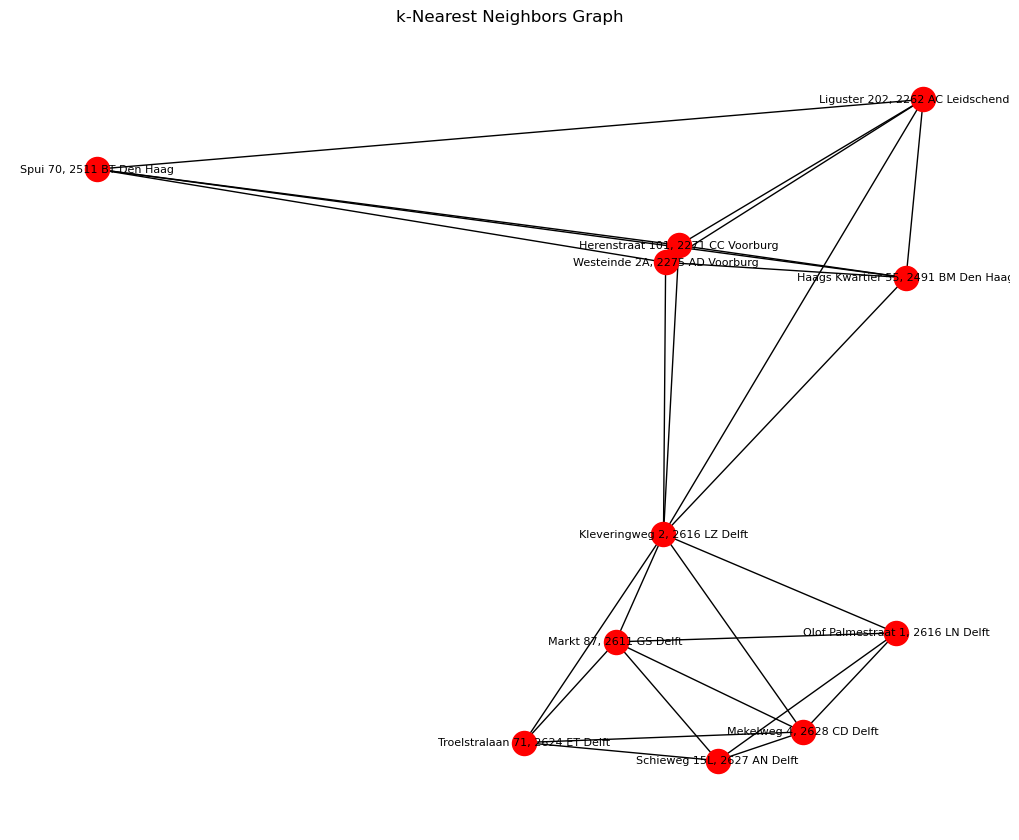

In [51]:
# Build the k-NN graph
k = 4  # Number of neighbors
G = build_knn_graph(coordinates, k)

# Plot the k-NN graph
plot_knn_graph(G)